In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine, make_blobs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC


from sklearn.cluster import KMeans

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier



import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

## 1. Naive Bayes

- 조건부 확률 과 관련 
    - 덧셈은 각각의 확률을 더하는(동시에 일어나지 않는)
    - 곱셈은 동시에 일어나는 
- 선형 모델과 유사(LogisticRegression,LinearSVC,....)
- 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다. 
- 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터일때 
    - MultinomialNB : 이산 데이터일 때 
 
 
 - 파라미터 
    - alpha
     


### (1) GaussianNB

In [14]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2)

In [15]:
model = GaussianNB().fit(X_train,y_train)

In [16]:
preds = model.predict(X_test)

In [17]:
print('정확도 :',accuracy_score(y_test,preds))

정확도 : 0.9666666666666667


In [18]:
confusion_matrix(y_test,preds)

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  8]], dtype=int64)

In [19]:
y_test

array([1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 2, 1])

### (2) MultinomiaINB, BernoulliNB

+ 영화리뷰를 이용한 평가 예측(긍정/부정)

In [20]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df=pd.DataFrame(review_list)

In [21]:
df
# 각각의 문장에 대해 숫자로 만들어야 함. 

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [10]:
##### 정답을 숫자로 바꾸기 - type 특성을 숫자로 매핑
df['label']=df['type'].map({'positive':1,'negative':0})
df


,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [11]:
##### 훈련,테스트 데이터 나누기(X,y나누기)
df_X=df['movie_review']
df_y=df['label']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_traincv=cv.fit_transform(df_X)
X_traincv
# --> 10x37 행렬로 바뀜.--> 37이 어떻게 나왔냐? 전체 단어의 갯수가 37개가 나온 것임.

# 객체를 실제 데이터로 만들어 줌(빈도수로) --> 단 각 문장에서 순서를 고려하지 않음
encoded_input=X_traincv.toarray()
encoded_input
# 해당 단어의 카운터 수(몇번 나왔는지)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [13]:
##### 단서사전
cv.get_feature_names()


['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [14]:
##### 다시 반전 
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [16]:
model = MultinomialNB().fit(X_traincv,df_y)

In [17]:
# 테스트 셋도 똑같이
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df=pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [18]:
test_df['label']=test_df['type'].map({'positive':1,'negative':0})
test_df

test_X=test_df['movie_review']
test_y=test_df['label']

In [19]:
X_testcv=cv.transform(test_X)
X_testcv


<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [20]:
preds = model.predict(X_testcv)
accuracy_score(test_y,preds)

1.0

In [21]:
model2 = BernoulliNB().fit(X_traincv,df_y)
test_df=pd.DataFrame(test_feedback_list)

test_df['label']=test_df['type'].map({'positive':1,'negative':0})

test_X=test_df['movie_review']
test_y=test_df['label']

X_testcv=cv.transform(test_X)
X_testcv

preds = model2.predict(X_testcv)
accuracy_score(test_y,preds)

1.0

####  + 스팸메일 분류

In [22]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]


In [23]:
df=pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [28]:
df['label']=df['spam'].map({True:1,False:0})
df_X=df['email title']
df_y=df['label']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_traincv=cv.fit_transform(df_X)
X_traincv



<6x17 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [30]:
model1 = MultinomialNB().fit(X_traincv,df_y)

In [31]:
model1 = MultinomialNB().fit(X_traincv,df_y)
test_df=pd.DataFrame(test_email_list)

test_df['label']=test_df['spam'].map({True:1,False:0})# 문자열이 아냐...

test_X=test_df['email title']
test_y=test_df['label']

X_testcv=cv.transform(test_X)
X_testcv

preds = model1.predict(X_testcv)
accuracy_score(test_y,preds)

0.8333333333333334

In [32]:
##### BernoulliNB
model2 = BernoulliNB().fit(X_traincv,df_y)
test_df=pd.DataFrame(test_email_list)

test_df['label']=test_df['spam'].map({True:1,False:0})

test_X=test_df['email title']
test_y=test_df['label']

X_testcv=cv.transform(test_X)
X_testcv

preds = model2.predict(X_testcv)
accuracy_score(test_y,preds)

0.8333333333333334

## 비지도 학습

### Kmeans 

- 1). 데이터 준비 
- 2). 얼마큼 군집화 할것인지
- 3). 중심점을 설정 --> 제일 중요
- 4). 가장 가까운 이웃 - norm2 --> knn과 비슷--> 분류
- 5). 중심점을 이동 --> 변화가 없을 때 까지 이동 시킴, 답을 모르니까 센터가 필요

- 센터 설정
    + 1. 랜덤하게 지정
    + 2. 직접 수동으로 지정
    + 3. kmean++

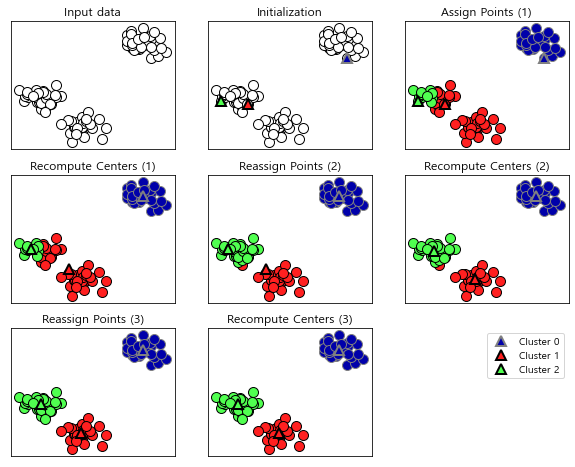

In [33]:
# 교육용
mglearn.plots.plot_kmeans_algorithm()

#### 1) make_blobs 샘플

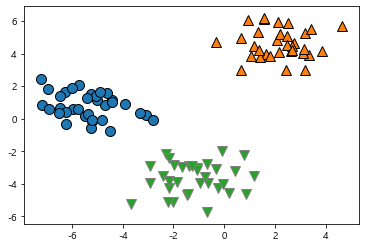

In [39]:
# 데이터 준비 
X,y = make_blobs()

mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [42]:
# 몇개로 분류할까? --> 본인 마음대로 

model = KMeans(n_clusters=3).fit(X)

In [43]:
model.labels_

array([2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [44]:
# 5개로 분류해서 훈련
model = KMeans(n_clusters=5).fit(X) # y_train(정답을 안넣음)

In [45]:
model.labels_

array([3, 1, 1, 3, 2, 3, 1, 1, 3, 0, 1, 1, 1, 0, 4, 4, 3, 1, 3, 2, 2, 0,
       4, 3, 3, 1, 0, 2, 2, 1, 1, 0, 1, 1, 4, 1, 1, 0, 3, 0, 3, 1, 2, 0,
       2, 1, 1, 1, 3, 2, 2, 3, 4, 3, 0, 2, 2, 4, 4, 1, 4, 1, 1, 3, 4, 1,
       2, 0, 1, 0, 0, 4, 4, 4, 2, 0, 3, 0, 1, 3, 3, 1, 3, 1, 2, 1, 2, 4,
       4, 1, 2, 1, 4, 0, 1, 4, 1, 0, 0, 1])

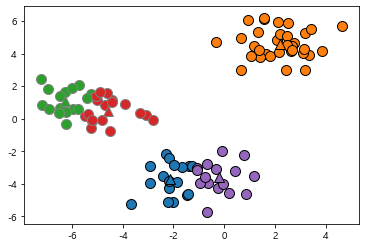

In [49]:
# 어떻게 훈련은 시켰는지 그래프로 확인  --> 중심점들 확인 
mglearn.discrete_scatter(X[:,0],X[:,1],model.labels_,markers='o')
mglearn.discrete_scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
                        [0,1,2,3,4],markers='^')

#### 2) make_moons 샘플

In [53]:
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

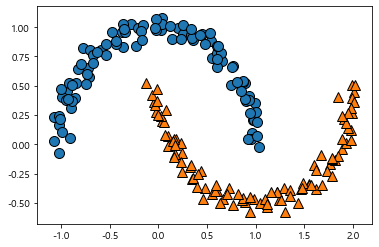

In [55]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [56]:
model=KMeans(n_clusters=2).fit(X)


In [57]:
model.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

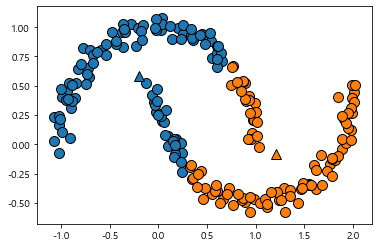

In [58]:
mglearn.discrete_scatter(X[:,0],X[:,1],model.labels_,markers='o')
mglearn.discrete_scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
                        [0,1],markers='^')

In [59]:
# 정답 확인해보기 
preds = model.predict(X)
accuracy_score(y,preds)

0.755

#### 3) iris 샘플

In [64]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

Text(0.5, 1.0, '꽃잎')

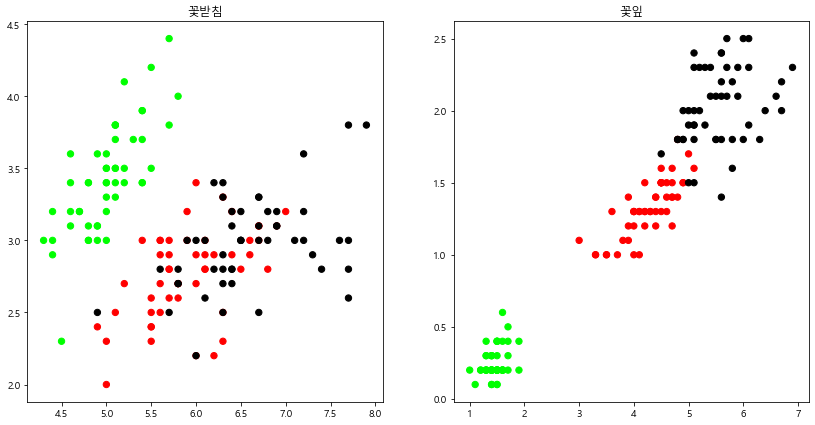

In [66]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [81]:
model=KMeans(n_clusters=3).fit(X)

In [82]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측값')

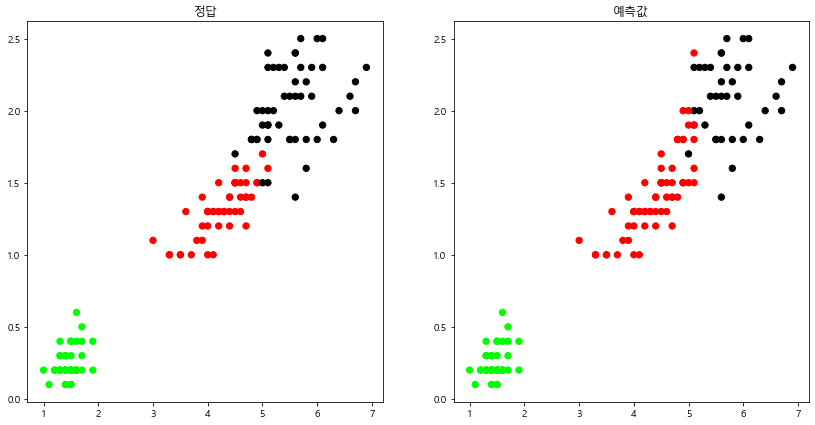

In [83]:
# petal과 예측한 값 비교 
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("예측값")

# 거의 똑 같음.

In [84]:
accuracy_score(y,model.labels_)

0.8933333333333333

In [85]:
confusion_matrix(y,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 4) 사람의 키와 몸무게를 활용 

In [75]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df


,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


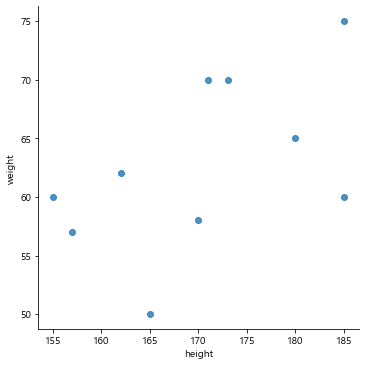

In [77]:
# 이 데이터를 3가지 분류로 나누고 싶다면? 
sns.lmplot('height','weight',data=df,fit_reg=False)

In [89]:
model = KMeans(n_clusters=3).fit(df.values)

In [90]:
df['label']=model.labels_
df

,height,weight,label
0,185,60,2
1,180,65,2
2,185,75,2
3,165,50,0
4,170,58,0
5,155,60,0
6,157,57,0
7,162,62,0
8,173,70,1
9,171,70,1


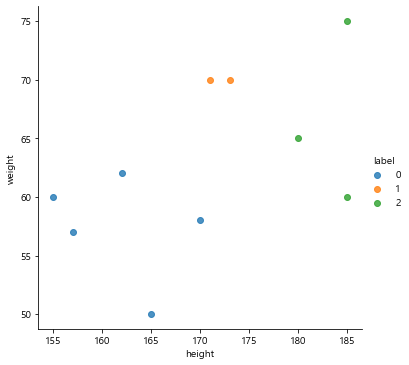

In [91]:
sns.lmplot('height','weight',data=df,fit_reg=False,hue='label')

----
### 3. 인공 신경망(Artificial Neural Network

- 입력 --> 은닉 --> 출력
- 은닉 층은 가중치와 계산되서 이것을 살릴만 한가 -->결국 분류알고리즘과 크게 다를게 없음
- backpropagation 

In [2]:
# 샘플 그림 

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

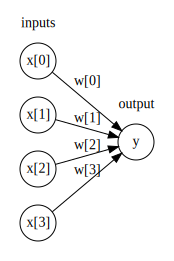

In [4]:
mglearn.plots.plot_logistic_regression_graph()

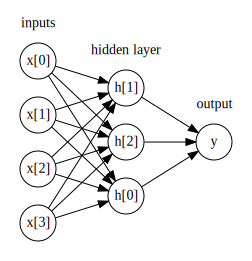

In [5]:
mglearn.plots.plot_single_hidden_layer_graph()
# 중간에 학습을 할 수 있는 충분한 공간을 만들어 줌

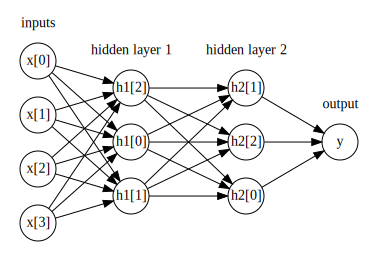

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()
# 다층 퍼셉트론(MLP) --> 딥러닝 
# 결국 다중 학습 

### (1) 퍼셉트론 
+ 다수의 신호를 입력받아 하나의 신호로 출력 
+ 기본은 로지스틱 회귀인데 중간에 은닉층이 낀것이 다층 퍼셉트론 

#### 1) AND gate

- a  --> ㅁ --> a,b 둘다 참이여야 참이 되는
- b

In [44]:
def AND(x1,x2):
#     if x1 == 0 and x2 ==0  --> 이건 지도학습이지 , w(가중치)를 찾아하는 것
    w1,w2= 0.5,0.5 # 가중치가 0.5면 AND함수를 해라
    b = 0.7
    # 이 가중치만 스스로 찾을 수 있다면 and 연산 가능 이것을 가능하게 하는게 퍼셉트론
    
    tmp = w1*x1+w2*x2
    if tmp <=b:
        return 0
    else :
        return 1
    return 0 

In [45]:
inputs = [(0,0),(1,0),(0,1),(1,1)]# 0,0,0,1 

for x1,x2 in inputs:
    y= AND(x1,x2)
    print('{},{}-->{}'.format(x1,x2,y))

0,0-->0
1,0-->0
0,1-->0
1,1-->1


#### 2) OR gate

In [46]:
def OR(x1,x2):
#     if x1 == 0 and x2 ==0  --> 이건 지도학습이지 , w(가중치)를 찾아하는 것
    w1,w2= 0.5,0.5 # 가중치가 0.5면 AND함수를 해라
    b = 0.2
    # 이 가중치만 스스로 찾을 수 있다면 and 연산 가능 이것을 가능하게 하는게 퍼셉트론
    
    tmp = w1*x1+w2*x2
    if tmp <=b:
        return 0
    else :
        return 1
     

In [47]:
inputs = [(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y= OR(x1,x2)
    print('{},{}-->{}'.format(x1,x2,y))

0,0-->0
1,0-->1
0,1-->1
1,1-->1


#### 3) XOR gate
- 서로가 다른 값일 때만 참임
+ 문제는 여기서 발생 
+ 앤드와 오얼 합치면 되긴함, 여러개 연결해서 되긴하는데 연결할때 발생하는 가중치를 스스로 학습할 수 없음 --> 그래서 안되는 것임 

def NAND(x1,x2):
    w1,w2= -0.5,-0.5 # 가중치 반전을 위해 - 를 취함 
    b = 0.7
    
    
#     tmp = w1*x1 + w2*x2
    tmp = (w1*x1 + w2*x2) +b
    if tmp <= b:
        return 0
    else :
        return 1
    

In [ ]:
def NAND(x1,x2):
    w1,w2= -0.5,-0.5 # 가중치 반전을 위해 - 를 취함 
    b = 0.7
    
    
#     tmp = w1*x1 + w2*x2
    tmp = (w1*x1 + w2*x2) +b
    if tmp <= b:
        return 0
    else :
        return 1
    

In [49]:
inputs = [(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y= NAND(x1,x2)
    print('{},{}-->{}'.format(x1,x2,y))

0,0-->0
1,0-->0
0,1-->0
1,1-->0


In [32]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w= np.array([-0.5,-0.5]) 
    b = -0.7
    
    
    tmp = np.sum(w*x)+b
   
    if tmp <= b:
        return 0
    else :
        return 1

In [33]:
inputs = [(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y= NAND(x1,x2)
    print('{},{}-->{}'.format(x1,x2,y))

0,0-->0
1,0-->0
0,1-->0
1,1-->0


In [24]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2= OR(x1,x2) 
    y = AND(s1,s2)
    return y

In [25]:
inputs = [(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y= XOR(x1,x2)
    print('{},{}-->{}'.format(x1,x2,y))

0,0-->0
1,0-->0
0,1-->0
1,1-->0


#### 이런 회로를 하나하나 설계하지 않아도 sklearn에서 제공해줌 

### (2) 인공신경망을 구현하는 방법

+ sklearn : Perceptron()--> 단일(은닉층이 한개,잘 안씀),MLPClassifier() --> 퍼셉트론을 여러개 연결한 것 

+ 다양한 시뮬레이션은 하지 못함 
    - --> 그래서 등장한게 ML,DL 프레임워크: 여러가지 모델을 만들고 실험할 수 있는 공간 : Tensorflow,Pytorch, Keras,Theano, ....

### 1) Perceptron

In [104]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [105]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test =sc.transform(X_test)

In [106]:
model = Perceptron(max_iter=40, eta0=0.1,random_state=0)
model.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=40)

In [107]:
preds=model.predict(X_test)
print(accuracy_score(y_test,preds))

0.7777777777777778


#### 2) MLPClassifier

In [108]:
# 퍼셉트론 한개 썼을 때보다 여러개 썼을 때 더 성능이 잘나오긴 함. 
model2= MLPClassifier(max_iter=500,hidden_layer_sizes=(500,500,500,500))
model2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500), max_iter=500)

In [109]:
preds=model2.predict(X_test)
print(accuracy_score(y_test,preds))

0.9555555555555556


## 4. Kaggle Challenge

 - 타이타닉 샘플을 이요한 알고리즘 성능 밗
 - 캐글 제출 용요
 - http.www.kaggle.com/c/titanic

### (1) prepared the data

In [111]:
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

In [113]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### (2) EDA

In [119]:
print(train.shape)
print(test.shape) # --> Survived 가 없음
train.info()
test.info()

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    i

In [120]:
# 변수들 관계 --> 막대그래프로 파악해보기 
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))


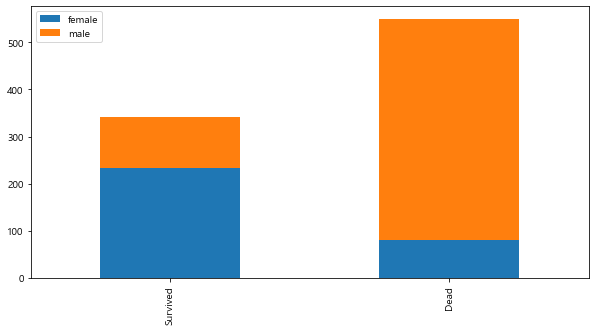

In [121]:
bar_chart('Sex')

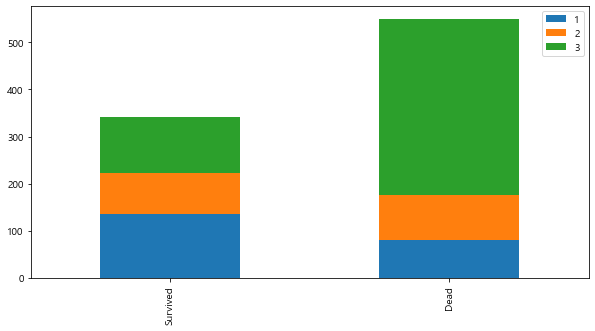

In [122]:
bar_chart('Pclass')

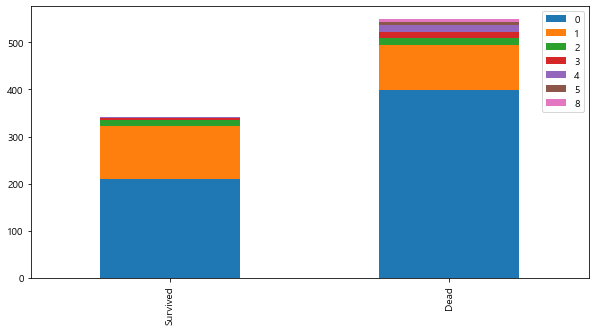

In [123]:
bar_chart('SibSp')

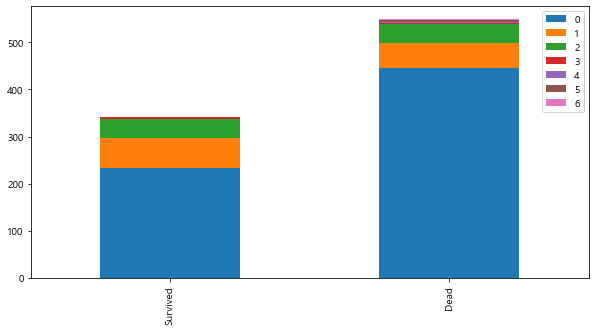

In [124]:
bar_chart('Parch')

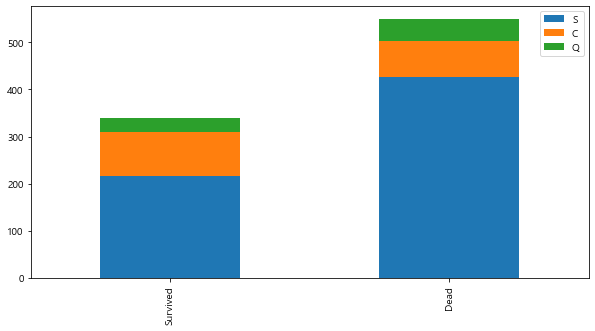

In [125]:
bar_chart('Embarked')

### (3) Feature Engineerubg

   #### 2) Name 에서 호칭 추출(Mr,Mirs,Miss)
   

In [126]:
train_test_data = [train,test]

In [127]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")


In [128]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Mme           1
Ms            1
Jonkheer      1
Countess      1
Sir           1
Lady          1
Capt          1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [129]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Mlle":3, "Major":3,
                 "Capt":3, "Mme":3, "Lady":3, "Countess":3, "Don":3, "Jonkheer":3, "Sir":3, "Ms":3,
                "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)


In [131]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [132]:
#### Name 특성 삭제 
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)


In [134]:
# 삭제 됬는지 확인 
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

#### 2) Age 의 Binning

In [137]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [139]:
##### 결측치 처리
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [140]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4


In [141]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


##### 3) Embarked의 결측치 처이와 인코딩


In [142]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [143]:
# 가장 많은 값으로 결측치 대체 
train['Embarked'].fillna('S',inplace=True)

In [144]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})


In [145]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


#### 4) Fare 의 결측치와 Binning

In [147]:
# 중앙 값으로 결측치 대체 
# Pclass 값으로 대체 
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)


In [148]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100, "Fare"] = 3


In [151]:
train.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


#### 5) Cabin 처리 

In [152]:
train['Cabin'].value_counts()
# 알파벳만 뽑아 내기 

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
B3             1
C32            1
C62 C64        1
E12            1
A20            1
Name: Cabin, Length: 147, dtype: int64

In [153]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]


In [154]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


In [155]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)


In [157]:
train['Cabin'].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [158]:
# 결측치 처리
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


#### 6) 성별 인코딩 

In [159]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})


In [160]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


#### 7) 동승자 칼럼 합치기 

In [161]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1


#### 8) 필요없는 컬럼 삭제 

In [162]:
feature_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)


In [163]:
train = train.drop(["PassengerId"], axis=1)


#### 9) 모델링

In [164]:
X = train.drop("Survived", axis=1)
y = train["Survived"]


In [165]:
print(X.shape,y.shape) # 잠깐 확인 

(891, 8) (891,)


In [166]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True,random_state=0)


In [170]:
##### KNN

knnclf = KNeighborsClassifier(n_neighbors=26)
scores=cross_val_score(knnclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [177]:
##### Decision Tree
dtclf = DecisionTreeClassifier()
scores=cross_val_score(dtclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.78888889 0.88764045 0.75280899 0.78651685 0.87640449 0.79775281
 0.79775281 0.79775281 0.74157303 0.80898876]


80.36

In [179]:
##### RandomForest
rfclf = RandomForestClassifier(n_estimators=300)
scores=cross_val_score(rfclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.8        0.85393258 0.78651685 0.80898876 0.88764045 0.82022472
 0.82022472 0.80898876 0.76404494 0.84269663]


81.93

In [181]:
##### NaiveBayes
nbclf = BernoulliNB()
scores=cross_val_score(nbclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]


78.56

In [183]:
##### Neural Network 
nlpclf = MLPClassifier(hidden_layer_sizes=(200,200,200,200,200))
scores=cross_val_score(nlpclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.77777778 0.84269663 0.79775281 0.82022472 0.86516854 0.86516854
 0.83146067 0.79775281 0.79775281 0.86516854]


82.61

In [184]:
##### SVM
svmpclf = SVC()
scores=cross_val_score(svmpclf,X,y,cv=kfold,scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### (5) Testing

In [185]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [186]:
model =SVC()
model.fit(X,y)

SVC()

In [189]:
test_data = test.drop('PassengerId',axis=1).copy()

In [191]:
test_data.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [192]:
preds = model.predict(test_data)

In [193]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [194]:
submission.to_csv('data/titanic/submission.csv',index=False)